In [1]:
for (pkg in c("ggplot2", "dplyr", "patchwork", "ggplotify")) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                pkg,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}

In [2]:
performances_file_path <- file.path("..", "results", "model_performances.parquet")
df <- arrow::read_parquet(performances_file_path)
df$feature <- gsub("all_terminal_features", "All features", df$feature)
df$feature <- gsub("Terminal_Cytoplasm_Intensity_IntegratedIntensity_AnnexinV", "AnnexinV single feature", df$feature)
df$shuffled <- factor(df$shuffled, levels = c("not_shuffled", "shuffled"))

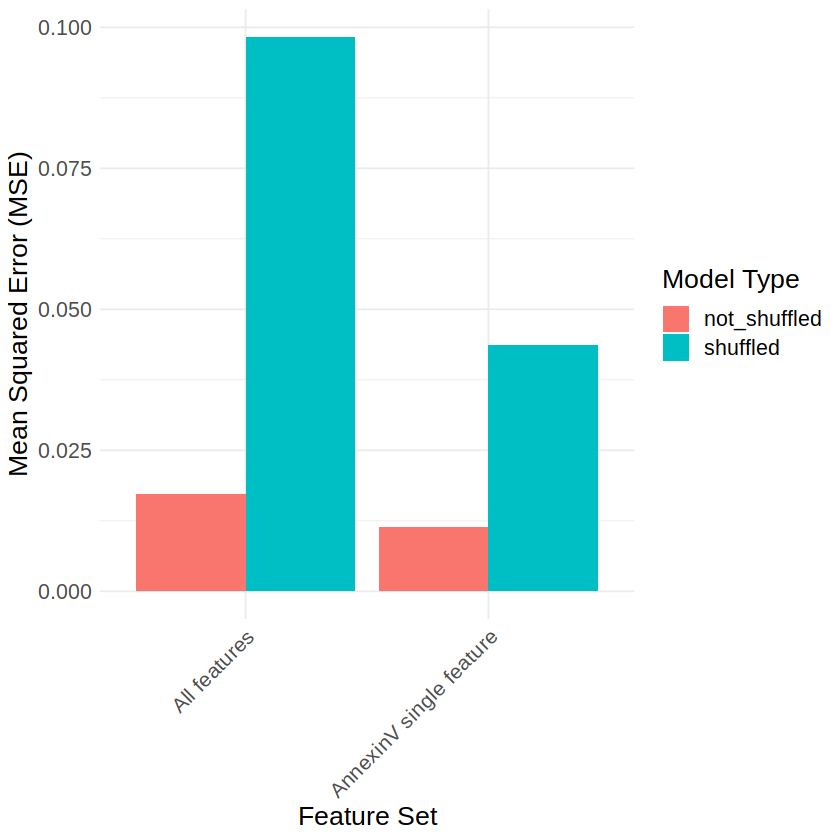

In [3]:
mse_plot <- (
    ggplot(df, aes(x = feature, y = mse, fill = shuffled))
    + geom_bar(stat = "identity", position = position_dodge()) 
    + theme_minimal() 
    + theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
    ) 
    + labs(
        x = "Feature Set",
        y = "Mean Squared Error (MSE)"
    )
    + theme(text = element_text(size = 16))
    + guides(fill = guide_legend(title = "Model Type"))
)
mse_plot

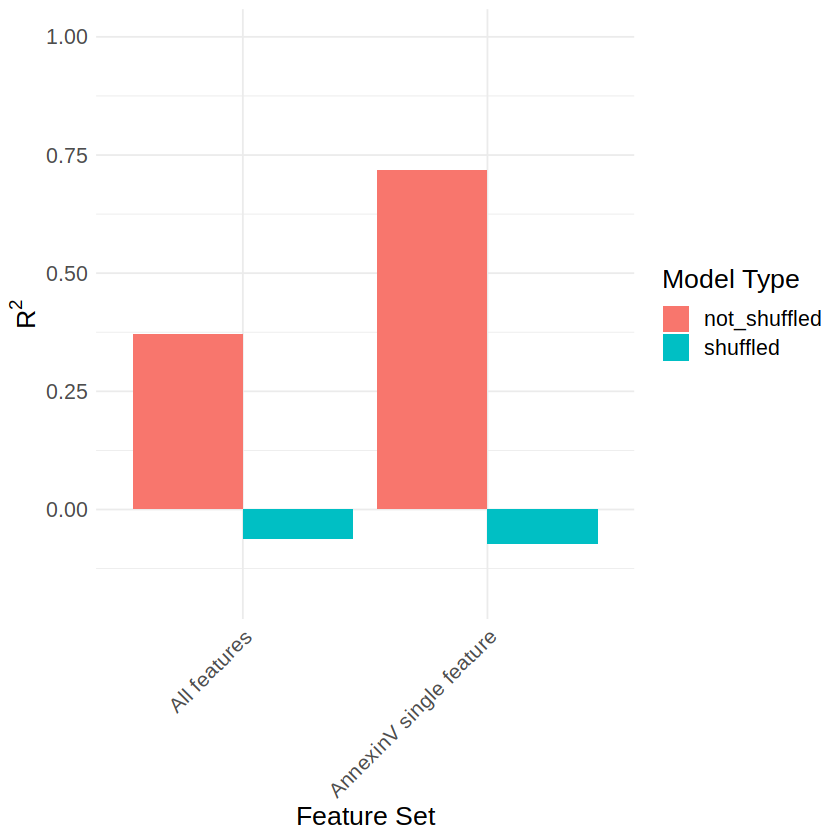

In [4]:
r2_plot <- (
    ggplot(df, aes(x = feature, y = r2, fill = shuffled))
    + geom_bar(stat = "identity", position = position_dodge()) 
    + theme_minimal() 
    + theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
    ) 
    + labs(
        x = "Feature Set",
        y = expression(R^2)
    )
    + ylim(min(df$r2) - 0.1, 1)
    + theme(text = element_text(size = 16))
    + guides(fill = guide_legend(title = "Model Type"))

)
r2_plot

## Assemble final figure 

In [5]:
width <- 16
height <- 10
dpi <- 600
options(repr.plot.width = width, repr.plot.height = height, repr.plot.res = dpi)
final_plot <- (
    mse_plot
    + r2_plot
    + plot_layout(nrow = 1, guides = "collect")
    + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 24))
)
png(
    filename = file.path("..", "figures", "model_performances.png"),
    width = width,
    height = height,
    units = "in",
    res = dpi
)
final_plot
dev.off()
final_plot

pdf 
  2